# Intern- Riya Mehta

### Prediction using unsupervised ML

From the 'iris' Dataset, predicted the optimum number of clusters and represented it visually.

In [122]:
#Importing libraries
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 

## STEP 1: Reading and understanding the dataset

In [123]:
#reading the datset
iris=pd.read_csv('Iris.csv')

In [124]:
#display the head
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
#checking shape
iris.shape

(150, 6)

In [126]:
#checking info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [127]:
#checking description
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [128]:
#checking null values
iris.isnull().sum()/len(iris)*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [129]:
#loading the dataset
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [130]:
#target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [131]:
#printing target Names
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [132]:
#load x & y 
x = iris.data
y = iris.target

## STEP 2: Data Visualization

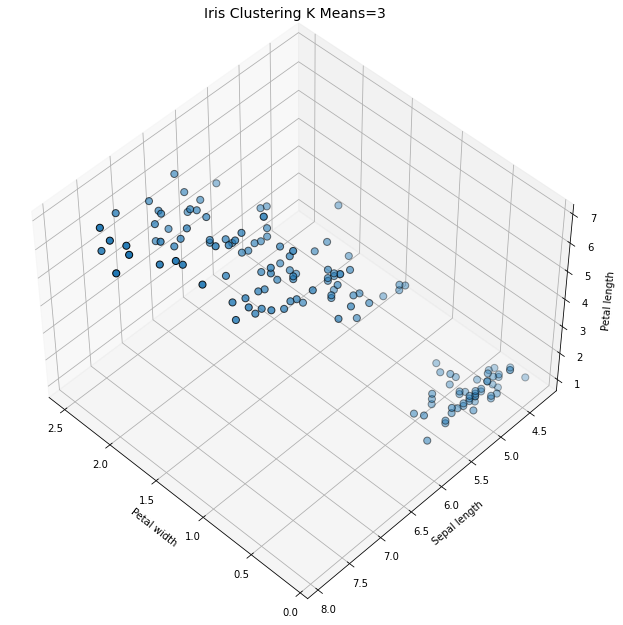

In [133]:
#Plotting 3d figure
fig = plt.figure(1, figsize=(10,8))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

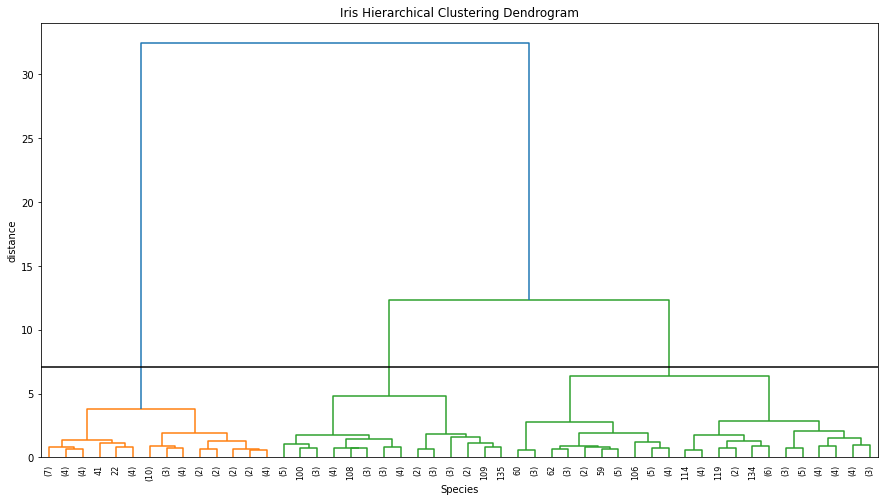

In [134]:
#plotting Hierachy Clustering dendogram
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(15,8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

## STEP 3: Data Preprocessing

In [135]:
#defining x & y variables
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [136]:
#display head of x
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [137]:
#display head of y
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


## STEP 4: Model Training

In [138]:
#creating k means clusters
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(n_clusters=3)

In [139]:
#printing k means labels
print(iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [140]:
#printing k means cluster center
print(iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


## STEP 5: Visualizing model clusters

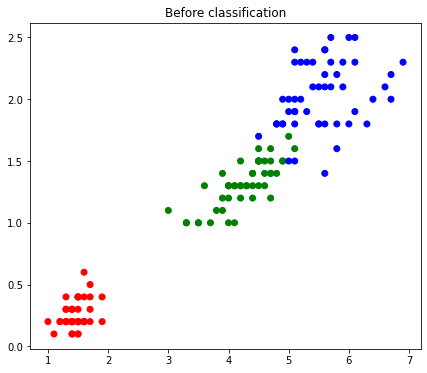

In [141]:
#plotting & visualizing before classification
plt.figure(figsize=(7,6))
colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.show()

RED--> SETOSA

GREEN--> VERSICOLOR

BLUE--> VIRGINICA

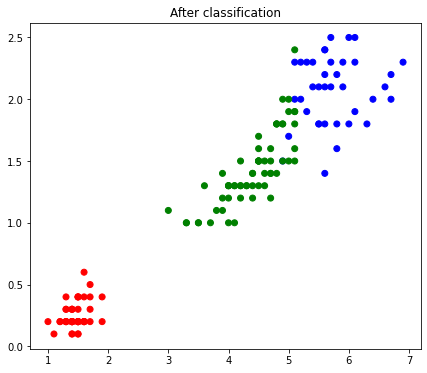

In [142]:
#plotting & visualizing after classification
plt.figure(figsize=(7,6))
colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title('After classification')
plt.show()

RED--> SETOSA

GREEN--> VERSICOLOR

BLUE--> VIRGINICA

## STEP 6: Calculating Accuracy & Confusion Matrix

In [143]:
#Calculating accuracy score
sm.accuracy_score(predictedY, y['Target'])

0.8933333333333333

In [144]:
#Calculating confusion matrix
sm.confusion_matrix(predictedY, y['Target'])

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

In a confusion matrix, the predicted class labels (0, 1, 2) are written along the top (column names). The true class labels (Iris-setosa, etc.) are written along the right side. Each cell in the matrix is a count of how many instances of a true class where classified as each of the predicted classes.  

## CONCLUSION

We analyzed the dataset and predicted the accuracy of the model as 89% using Machine learning